# Week 5 - Logistic Regression and Classification Error Metrics

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

Alternatively the same data set can be found at https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/downloads/human-activity-recognition-with-smartphones.zip
The train file can be renamed as Human_Activity_Recognition_Using_Smartphones_Data.csv

For each record in the dataset it is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.

More information about the features is available on the website above.

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [2]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell
filepath = '../../data/Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')

In [3]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data columns are all floats except for the activity label.

In [4]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [5]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [6]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [7]:
data.iloc[:, :-1].max().value_counts()

1.0    561
Name: count, dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [8]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

250     3
7791    5
7164    5
1373    0
4573    1
Name: Activity, dtype: int64

In [13]:
print('Activity Label Encoding:')
for cls in le.classes_:
    print(f'\t* {cls} -> {le.transform([cls])[0]}')

Activity Label Encoding:
	* LAYING -> 0
	* SITTING -> 1
	* STANDING -> 2
	* WALKING -> 3
	* WALKING_DOWNSTAIRS -> 4
	* WALKING_UPSTAIRS -> 5


## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [15]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.nan

# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

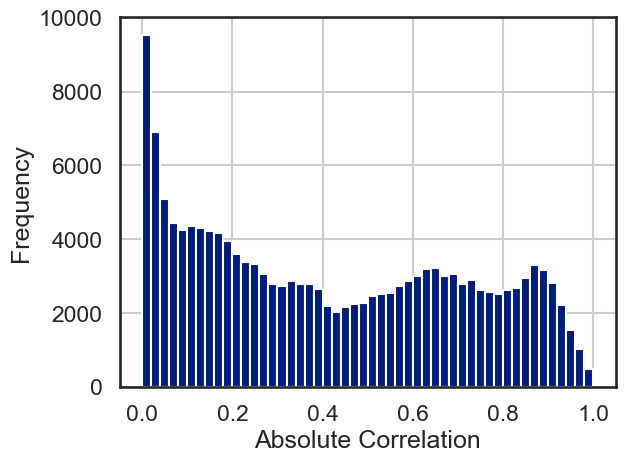

In [17]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [18]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [20]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [21]:
y_test.value_counts(normalize=True)

Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

#Important note: ***LogisticRegression*** has actually a built-in default regularization - check the documentation

In [25]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [26]:
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [33]:
# L1 regularized logistic regression
# lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', max_iter=1000).fit(X_train, y_train)
from sklearn.multiclass import OneVsRestClassifier

lr_l1 = OneVsRestClassifier(LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', max_iter=100)).fit(X_train, y_train)

In [34]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

In [35]:
# L2 regularized logistic regression
lr_l2 = OneVsRestClassifier(LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', max_iter=1000)).fit(X_train, y_train)

LogisticRegressionCV loops over the following regularization levels

Note that multi-class ***LogisticRegression*** actually produces a different classifier for each class (one-vs-all)

In [38]:
lr.coef_.shape

(6, 561)

In [41]:
lr_l1.estimators_[0].coef_.shape

(1, 561)

In [42]:
lr_l2.estimators_[0].coef_.shape

(1, 561)

Let´s try a non-regularized (high C) LR

In [44]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr_no_reg = LogisticRegression(C=100000, max_iter=1000).fit(X_train, y_train)

Note the higher coefficients for the non-reg LR

In [45]:
print(np.max(np.abs(lr.coef_)))
print(np.max(np.abs(lr_no_reg.coef_)))

3.5785269981814203
103.58366000207074


## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.

In [49]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2','lr_no_reg']
coeff_models = [lr.coef_,
                np.vstack([est.coef_ for est in lr_l1.estimators_]),
                np.vstack([est.coef_ for est in lr_l2.estimators_]),
                lr_no_reg.coef_]

for lab, mod in zip(coeff_labels, coeff_models):
    coeffs = mod
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)


lr                                                          l1  \
            0         1         2         3         4         5         0   
412 -0.040955  0.038471  0.083432 -0.025373  0.053343 -0.108919  0.000000   
132  0.051298 -0.033656  0.096345  0.270418 -0.361237 -0.023168  0.000000   
510 -0.047742 -0.220960 -0.182992 -0.091357  0.406545  0.136506  0.000000   
194  0.015322  0.402377 -0.626772 -0.299887  0.088027  0.420934  0.000000   
39  -0.395548  0.211823  0.085296  0.351068 -0.469289  0.216650 -0.198047   
483 -0.042453  0.030909  0.089857 -0.056097  0.031997 -0.054212 -0.014709   
329 -0.047636  0.027641  0.042424  0.092976 -0.062534 -0.052871  0.000000   
276  0.051589 -0.088845  0.067224  0.152086 -0.319184  0.137129  0.000000   
225 -0.004392  0.120629 -0.126503 -0.263632 -0.002935  0.276833  0.000000   
177 -0.043678  0.013976  0.099451 -0.078994  0.077058 -0.067814  0.000000   

                                   ...        l2                      \
            1         2         3  ...         2         3         4   
412  0.231548  0.272754 -0.017964  ...  0.347005  0.021388  0.524147   
132 -1.711731  0.000000 -0.046241  ...  0.006363  0.681037 -2.238370   
510  0.000000  0.000000  0.194382  ...  0.220226 -0.186406  2.515016   
194  0.000000 -1.505545 -3.797242  ... -1.165798 -1.300243  1.351622   
39   0.148198 -0.362762  0.428712  ... -0.259051  0.382824 -4.165793   
483  0.225934  0.085879  0.046879  ...  0.201652  0.078054 -0.591303   
329  0.000000  0.000000  0.169893  ...  0.134705  0.046333 -0.870263   
276 -0.032360  0.000000  0.673075  ...  0.335025  0.788280 -2.026114   
225  0.000000 -0.196048 -3.613927  ... -0.384813 -0.769331  0.094012   
177  0.050591  0.000000 -0.134197  ...  0.177638 -0.252187  0.171127   

              lr_no_reg                                                         
            5         0          1          2          3          4          5  
412  0.459225 -0.082289   1.654049   3.067377  -1.811444   1.029498  -3.857191  
132 -0.927907  2.304654  -6.378319   9.471832   4.300902 -10.168200   0.469131  
510  1.402224 -5.608050 -16.883166  -2.610857   4.384953  14.040162   6.676960  
194  2.916670 -2.587217  11.298039 -18.120005  -9.997464   2.711563  16.695084  
39   0.136504 -5.609602   8.018309  -7.306602  12.673139 -14.717529   6.942285  
483  0.823673 -0.272103   1.171820   3.198645  -3.211417   1.709281  -2.596225  
329  0.207997 -1.172850   1.121113   0.601593   0.612875   0.221243  -1.383973  
276  1.484587  1.033907  -3.505617  -0.817180   5.633840  -7.908617   5.563667  
225  1.110121  2.604324  -1.804908  -2.689474  -4.675607   0.217075   6.348591  
177  0.383227 -0.469171   0.474357   3.423340  -3.210397   2.152351  -2.370481  

[10 rows x 24 columns]

Prepare six separate plots for each of the multi-class coefficients.

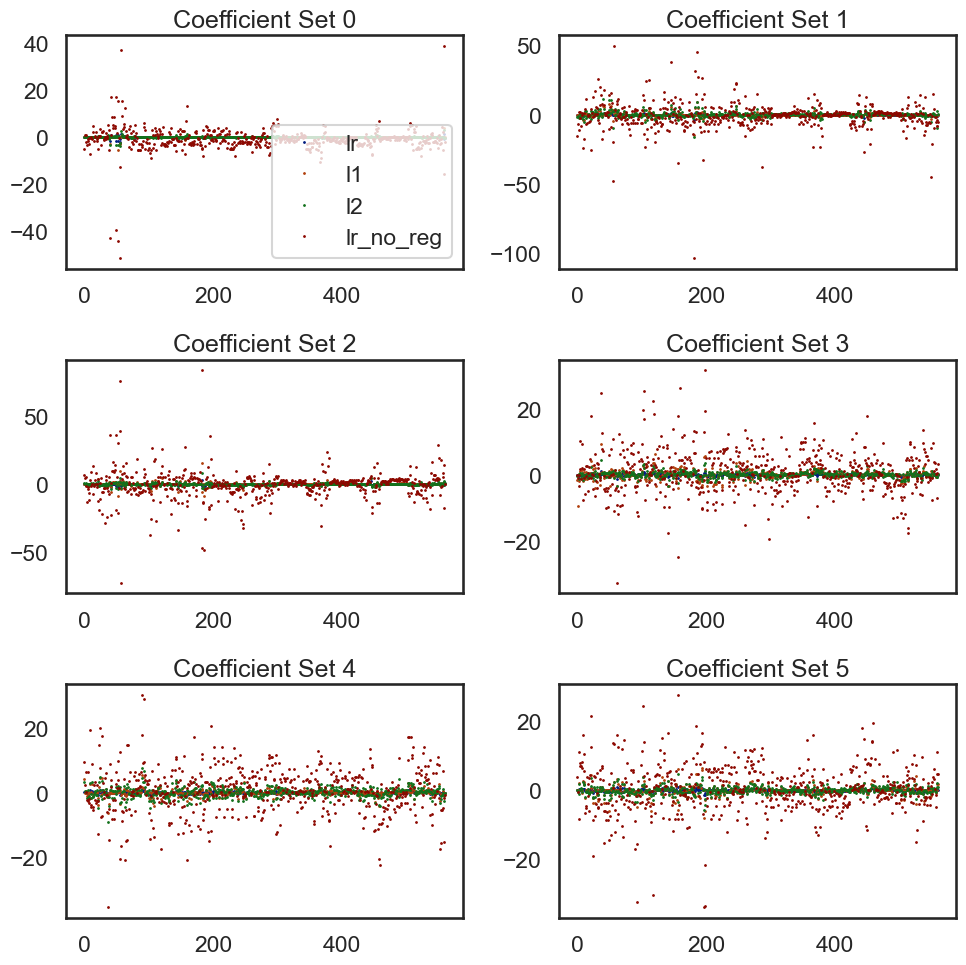

In [50]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]

    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=1.0, ax=ax, legend=False)

    if ax is axList[0]:
        ax.legend(loc=4)

    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()


## Question 6

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model.

In [51]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2','lr_no_reg']
coeff_models = [lr, lr_l1, lr_l2, lr_no_reg]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()


,lr,l1,l2,lr_no_reg
0,3,3,3,3
1,5,5,5,5
2,3,3,3,3
3,1,1,1,1
4,0,0,0,0


In [52]:
y_prob.head()

,lr,l1,l2,lr_no_reg
0,0.999981,0.999044,0.999757,1.0
1,0.998230,0.999486,0.999998,1.0
2,0.996524,0.995854,0.999904,1.0
3,0.990143,0.999158,0.994330,1.0
4,0.998108,0.999921,0.999998,1.0


## Question 7

For each model, calculate the following error metrics:

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [53]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),
              average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)


In [54]:
#Run the metrics
metrics

,lr,l1,l2,lr_no_reg
precision,0.983160,0.983835,0.984148,0.982208
recall,0.983172,0.983819,0.984142,0.982201
fscore,0.983164,0.983815,0.984143,0.982193
accuracy,0.983172,0.983819,0.984142,0.982201
auc,0.989793,0.990144,0.990352,0.989213


## Question 8

Display or plot the confusion matrix for each model.
Note that:

*   the regularized LRs perform better in the testing set

*   Most of the confusions are betweeen ***standing*** and ***sitting***  



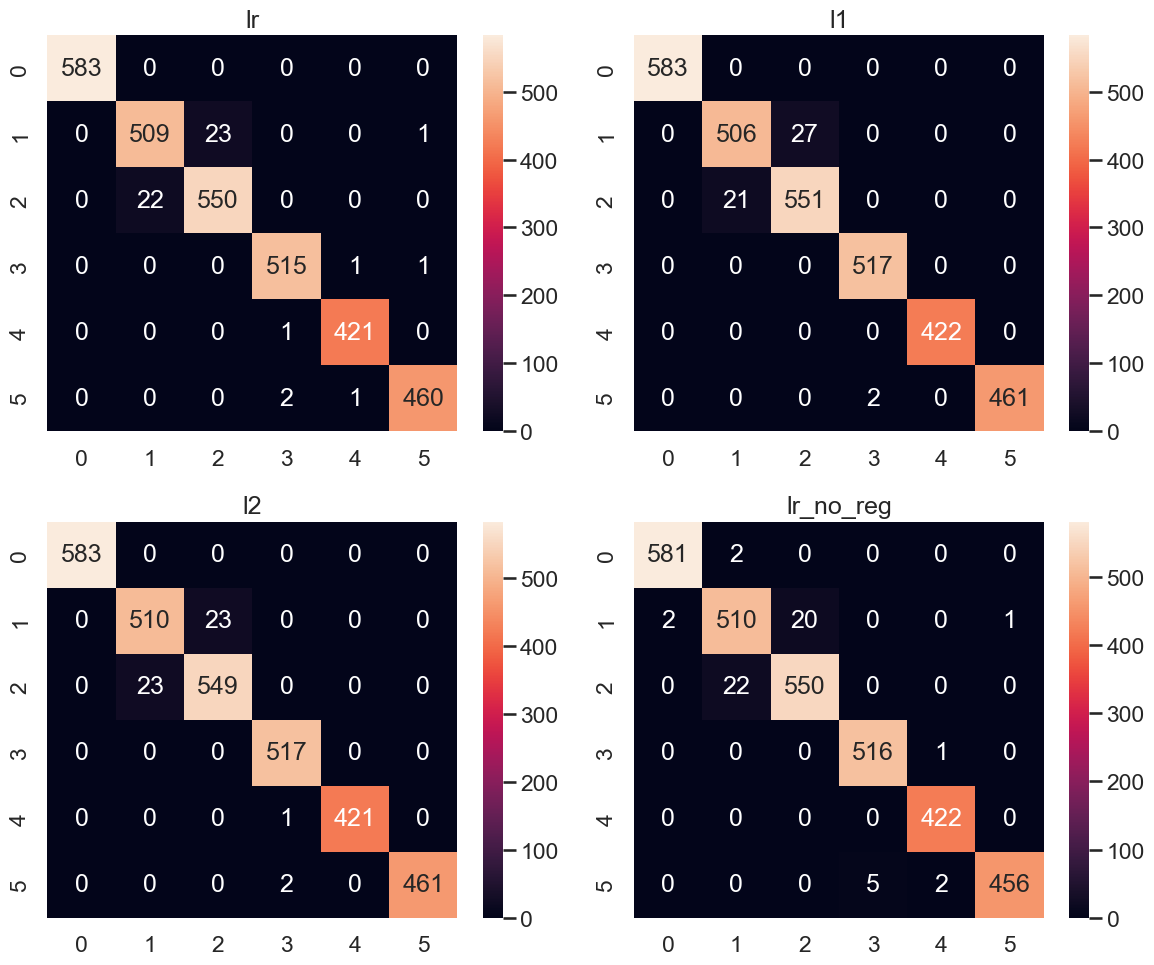

In [56]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

#axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d')
    ax.set(title=lab)

plt.tight_layout()


## Question 9
 Identify highly correlated columns and drop those columns before building models

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

#threshold with .7

sel = VarianceThreshold(threshold=(.7 * (1 - .7)))

data2 = pd.concat([X_train,X_test])
data_new = pd.DataFrame(sel.fit_transform(data2))


data_y = pd.concat([y_train,y_test])

from sklearn.model_selection import train_test_split

X_new, X_test_new = train_test_split(data_new)
Y_new, Y_test_new = train_test_split(data_y)

 Repeat Model building with new training data after removing higly correlated columns

In [59]:
# Try standard, L1 and L2 Logistic regression
lr_new = LogisticRegression(max_iter=1000).fit(X_new, Y_new)

In [60]:
lr_l1_new = OneVsRestClassifier(LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', max_iter=100)).fit(X_new, Y_new)

In [61]:
lr_l2_new = OneVsRestClassifier(LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', max_iter=1000)).fit(X_new, Y_new)

In [62]:
lr_no_reg_new = LogisticRegression(C=100000, max_iter=1000).fit(X_new, Y_new)

In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

## Question 10

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.

In [63]:
# Combine all the coefficients into a dataframe for comparison
coefficients_new = list()

coeff_labels = ['lr_new', 'l1_new', 'l2_new','lr_no_reg_new']
coeff_models = [lr_new.coef_,
                np.vstack([est.coef_ for est in lr_l1_new.estimators_]),
                np.vstack([est.coef_ for est in lr_l2_new.estimators_]),
                lr_no_reg_new.coef_]

for lab, mod in zip(coeff_labels, coeff_models):
    coeffs = mod
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients_new.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients_new = pd.concat(coefficients_new, axis=1)

coefficients_new.sample(10)

lr_new                                                   l1_new       \
           0         1         2         3         4         5      0    1   
8   0.138429  0.221344  0.420181 -0.144513 -0.356196 -0.279245    0.0  0.0   
45  0.069689 -0.076905 -0.361848  0.479778  0.538051 -0.648767    0.0  0.0   
24  0.123503 -0.144984  0.026158  0.102976 -0.124387  0.016734    0.0  0.0   
33  0.475834 -0.356034  0.458016 -0.201043 -0.266192 -0.110580    0.0  0.0   
13  0.117344  0.049576  0.080863  0.011677 -0.172587 -0.086873    0.0  0.0   
12 -0.384690  0.392832 -0.310794  0.227686  0.014824  0.060142    0.0  0.0   
34  0.170670  0.338036  0.042054 -0.485212  0.029524 -0.095072    0.0  0.0   
21 -0.005715  0.069726 -0.121059  0.058374 -0.017087  0.015760    0.0  0.0   
10 -0.095278 -0.041173 -0.038150  0.015857  0.125903  0.032841    0.0  0.0   
9   0.047706 -0.036332  0.057865 -0.013420 -0.066941  0.011122    0.0  0.0   

                   ...    l2_new                               lr_no_reg_new  \
           2    3  ...         2         3         4         5             0   
8   0.554689  0.0  ...  0.524804  0.090479  0.063273 -0.040776      0.180970   
45 -0.455283  0.0  ... -0.469042 -0.031957 -0.022734 -0.034592      0.073791   
24  0.000000  0.0  ...  0.107058  0.097270  0.102735  0.099074     -0.106243   
33  0.539059  0.0  ...  0.558433 -0.081500 -0.061879 -0.023345      0.636521   
13  0.060893  0.0  ...  0.081209 -0.012189 -0.045402 -0.033564      0.140105   
12 -0.384232  0.0  ... -0.411870 -0.019227 -0.038444 -0.039900     -0.457998   
34  0.000000  0.0  ...  0.049228 -0.016209 -0.017816 -0.009045      0.196485   
21 -0.279013  0.0  ... -0.167284 -0.137628 -0.144723 -0.094409     -0.012320   
10 -0.037115  0.0  ... -0.038036  0.040144  0.124486  0.034683     -0.094771   
9   0.065712  0.0  ...  0.067964 -0.046844 -0.093615 -0.052036      0.045007   

                                                      
           1         2         3         4         5  
8   0.261338  0.475355 -0.146534 -0.405824 -0.365305  
45 -0.101710 -0.405165  0.625073  0.599072 -0.791060  
24 -0.393215  0.509761  0.263263 -0.240619 -0.032947  
33 -0.488830  0.588245 -0.247466 -0.405036 -0.083434  
13  0.069724  0.056356  0.045280 -0.230162 -0.081303  
12  0.497271 -0.420858  0.291615  0.040101  0.049869  
34  0.394849  0.061959 -0.590112  0.060513 -0.123694  
21  0.075587 -0.138982  0.072226 -0.022315  0.025805  
10 -0.040942 -0.039131  0.016047  0.126049  0.032749  
9  -0.040908  0.063064 -0.014936 -0.069486  0.017258  

[10 rows x 24 columns]

Prepare six separate plots for each of the multi-class coefficients.

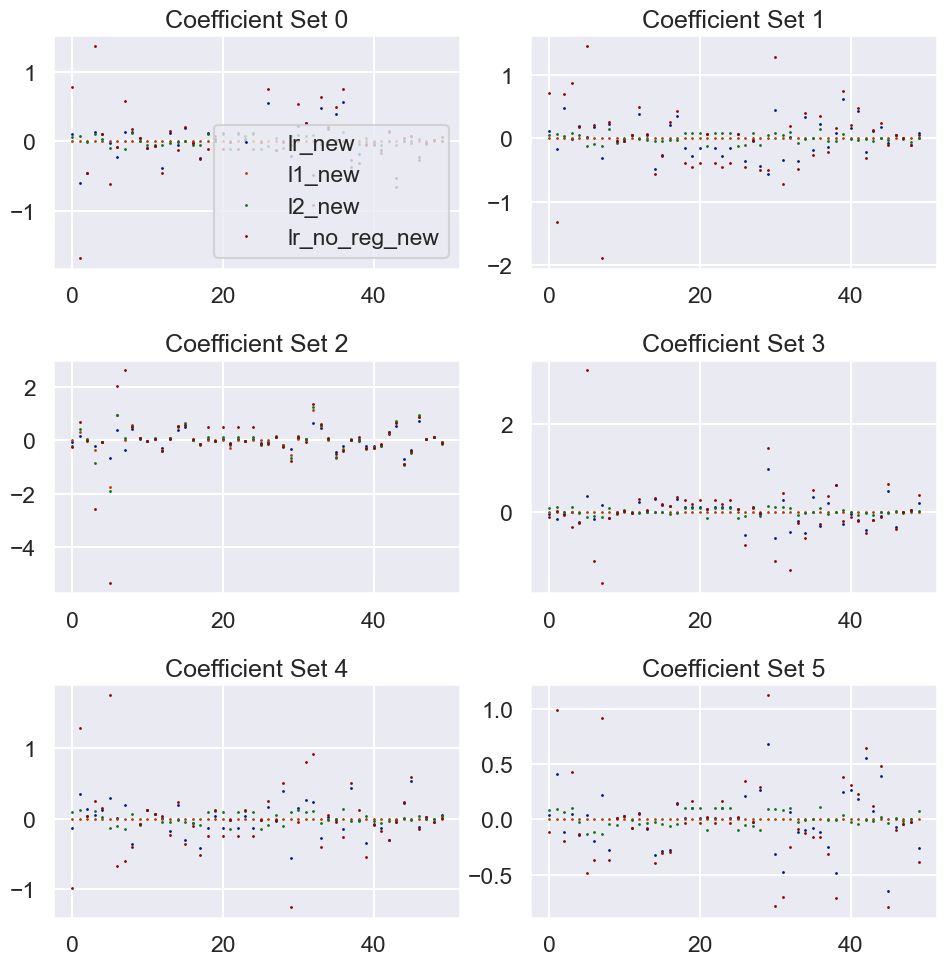

In [64]:
# try the plots
# plot the coefficients

fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)
for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]

    data = coefficients_new.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=1.0, ax=ax, legend=False)

    if ax is axList[0]:
        ax.legend(loc=4)

    ax.set(title='Coefficient Set '+str(loc))
plt.tight_layout()

As we can see the coefficients are different after removing highly correlated columns

## Question 11

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model.

In [65]:
# Predict the class and the probability for each

y_pred_new = list()
y_prob_new = list()
coeff_labels = ['lr_new', 'l1_new', 'l2_new','lr_no_reg_new']
coeff_models = [lr_new, lr_l1_new, lr_l2_new, lr_no_reg_new]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_new.append(pd.Series(mod.predict(X_test_new), name=lab))
    y_prob_new.append(pd.Series(mod.predict_proba(X_test_new).max(axis=1), name=lab))
y_pred_new = pd.concat(y_pred_new, axis=1)
y_prob_new = pd.concat(y_prob_new, axis=1)
y_pred_new.head()

,lr_new,l1_new,l2_new,lr_no_reg_new
0,1,5,5,1
1,4,5,5,3
2,0,5,5,2
3,2,5,2,4
4,1,5,2,1


In [67]:
# plot the results
y_prob_new.head()


,lr_new,l1_new,l2_new,lr_no_reg_new
0,0.216717,0.186925,0.190461,0.229722
1,0.186417,0.187515,0.189672,0.191588
2,0.189235,0.186025,0.185724,0.190835
3,0.195998,0.185168,0.185743,0.217699
4,0.230598,0.186979,0.194417,0.234919


## Question 12

For each model, calculate the following error metrics:

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [71]:
from sklearn.metrics import precision_recall_fscore_support as score

metrics_new = list()
cm_new = dict()

for lab in coeff_labels:
    # Precision, recall, f-score with zero_division parameter
    precision, recall, fscore, _ = score(Y_test_new, y_pred_new[lab], average='weighted', zero_division=0)

    # The usual way to calculate accuracy
    accuracy = accuracy_score(Y_test_new, y_pred_new[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(Y_test_new, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred_new[lab], classes=[0,1,2,3,4,5]),
              average='weighted')

    # Last, the confusion matrix
    cm_new[lab] = confusion_matrix(Y_test_new, y_pred_new[lab])

    metrics_new.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics_new = pd.concat(metrics_new, axis=1)


In [73]:
# Run the metrics
metrics_new

,lr_new,l1_new,l2_new,lr_no_reg_new
precision,0.160122,0.026858,0.120228,0.163587
recall,0.182913,0.163883,0.172039,0.182524
fscore,0.151317,0.046152,0.132654,0.155294
accuracy,0.182913,0.163883,0.172039,0.182524
auc,0.503350,0.500000,0.497077,0.503439


## Question 13

Display or plot the confusion matrix for each model.

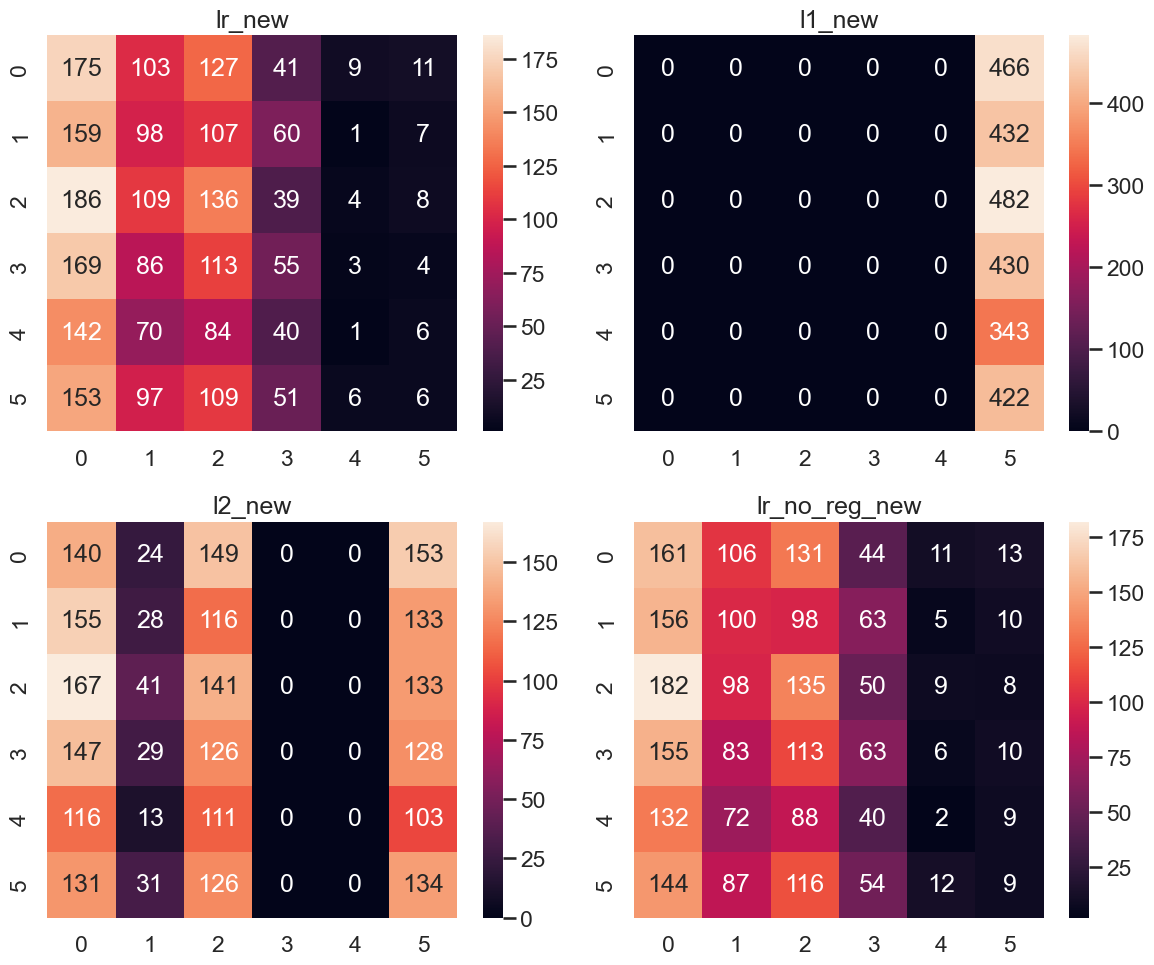

In [74]:
# plot the confusion matrix
# use the library to get the CM
from sklearn.metrics import ConfusionMatrixDisplay

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)
#axList[-1].axis('off')
for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(cm_new[lab], ax=ax, annot=True, fmt='d')
    ax.set(title=lab)
plt.tight_layout()

In [75]:
# Perform a comparison of the outputs between Question 7 and 12 and give your observation
# compare the metrics and metrics_new

metrics_new

,lr_new,l1_new,l2_new,lr_no_reg_new
precision,0.160122,0.026858,0.120228,0.163587
recall,0.182913,0.163883,0.172039,0.182524
fscore,0.151317,0.046152,0.132654,0.155294
accuracy,0.182913,0.163883,0.172039,0.182524
auc,0.503350,0.500000,0.497077,0.503439


In [76]:
metrics

,lr,l1,l2,lr_no_reg
precision,0.983160,0.983835,0.984148,0.982208
recall,0.983172,0.983819,0.984142,0.982201
fscore,0.983164,0.983815,0.984143,0.982193
accuracy,0.983172,0.983819,0.984142,0.982201
auc,0.989793,0.990144,0.990352,0.989213


As we can see the new metrics are way worse then the previous ones, so removing highly correlated columns was not a good idea in this case

In [ ]:
# Perform a comparison of the outputs between Question 8 and 13 and give your observation

If we look at the confusion matrics, in the first (8) we see most of the data is in the diagonal, while in the second (13) there is a lot more confusion between the classes, so again removing highly correlated columns was not a good idea in this case